In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import joblib

from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier



In [2]:
data_path = '../Data/'

model_path = '../Models/'

transform_path = '../Transformations/'

In [3]:
flood = pd.read_csv(data_path + 'flood_data.csv')
flood.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,Suncity,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,Suncity,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,Suncity,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,Suncity,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,Suncity,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
flood.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [5]:
flood.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
flood.isna().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [7]:
flood.duplicated().sum()

0

<Axes: ylabel='Density'>

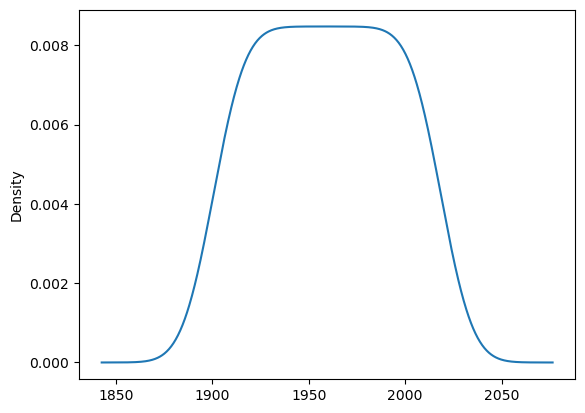

In [8]:
flood.YEAR.plot(kind= 'density')

In [9]:
flood.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,Suncity,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,Suncity,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,Suncity,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,Suncity,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,Suncity,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [10]:
flood.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [11]:
num_cols = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL']

In [12]:
useful_data = flood[num_cols]
useful_data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6


In [13]:
useful_data.to_csv(transform_path + 'chosen_house.csv', index=False)

In [14]:
useful_data_array =  useful_data.values
useful_data_array

array([[1.9010e+03, 2.8700e+01, 4.4700e+01, ..., 3.5080e+02, 4.8400e+01,
        3.2486e+03],
       [1.9020e+03, 6.7000e+00, 2.6000e+00, ..., 1.5830e+02, 1.2150e+02,
        3.3266e+03],
       [1.9030e+03, 3.2000e+00, 1.8600e+01, ..., 1.5700e+02, 5.9000e+01,
        3.2712e+03],
       ...,
       [2.0160e+03, 2.4000e+00, 3.8000e+00, ..., 1.2540e+02, 2.3600e+01,
        2.1766e+03],
       [2.0170e+03, 1.9000e+00, 6.8000e+00, ..., 9.2500e+01, 3.8100e+01,
        2.1171e+03],
       [2.0180e+03, 2.9100e+01, 5.2100e+01, ..., 1.2540e+02, 6.5100e+01,
        4.4730e+03]])

In [15]:
target_col = 'FLOODS'
target = flood[target_col]
target

0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
113    YES
114     NO
115     NO
116     NO
117    YES
Name: FLOODS, Length: 118, dtype: object

In [16]:
num_target_data = pd.concat([useful_data, target], axis = 1)
num_target_data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [55]:
num_target_data.to_csv(transform_path + 'transform_num_target_data_v1.csv', index=False)

In [56]:
pd.read_csv(transform_path + 'transform_num_target_data_v1.csv')

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [19]:
num_target_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              118 non-null    int64  
 1   JAN               118 non-null    float64
 2   FEB               118 non-null    float64
 3   MAR               118 non-null    float64
 4   APR               118 non-null    float64
 5   MAY               118 non-null    float64
 6   JUN               118 non-null    float64
 7   JUL               118 non-null    float64
 8   AUG               118 non-null    float64
 9   SEP               118 non-null    float64
 10  OCT               118 non-null    float64
 11  NOV               118 non-null    float64
 12  DEC               118 non-null    float64
 13   ANNUAL RAINFALL  118 non-null    float64
 14  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 14.0+ KB


In [20]:
num_target_data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [21]:
list(num_target_data.columns).index('FLOODS')

14

In [22]:
num_target_data_array = num_target_data.values

In [23]:
X = num_target_data_array[:, :14]

Y = num_target_data_array[:, 14]

In [24]:
# rescaling
min_max = MinMaxScaler()
min_max

MinMaxScaler()

In [25]:
min_max.fit(X)

MinMaxScaler()

In [26]:
X_scaled = min_max.transform(X)
X_scaled

array([[0.        , 0.34371257, 0.56582278, ..., 0.95570189, 0.2388724 ,
        0.49072457],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.37952709, 0.60039565,
        0.52316779],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.37563604, 0.29129575,
        0.50012478],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.28105358, 0.11622156,
        0.0448382 ],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.18258007, 0.18793274,
        0.02008984],
       [1.        , 0.34850299, 0.65949367, ..., 0.28105358, 0.3214639 ,
        1.        ]])

In [27]:
len(X_scaled)

118

In [28]:
scaler = StandardScaler()
scaler

StandardScaler()

In [29]:
scaler.fit(X_scaled)

StandardScaler()

In [30]:
X_scaled_final = scaler.transform(X_scaled)
X_scaled_final

array([[-1.71743408,  1.06965812,  1.77919877, ...,  2.27514032,
         0.22975198,  0.71781316],
       [-1.68807624, -0.35816607, -0.79783302, ..., -0.04841464,
         2.23136253,  0.8910505 ],
       [-1.65871839, -0.58531992,  0.18156148, ..., -0.06410618,
         0.5199992 ,  0.76800757],
       ...,
       [ 1.65871839, -0.6372408 , -0.72437844, ..., -0.44553131,
        -0.44931699, -1.66308973],
       [ 1.68807624, -0.66969135, -0.54074197, ..., -0.84264797,
        -0.0522807 , -1.79523873],
       [ 1.71743408,  1.09561856,  2.23216872, ..., -0.44553131,
         0.68702826,  3.43719516]])

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_final, Y, test_size = 0.3)

In [32]:
Log_reg_model = LogisticRegression()
Log_reg_model

LogisticRegression()

In [33]:
Log_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [34]:
Y_pred = Log_reg_model.predict(X_test)[:5]
Y_pred

array(['YES', 'NO', 'YES', 'YES', 'YES'], dtype=object)

In [35]:
Score = Log_reg_model.score(X_test, Y_test)
Score

0.9166666666666666

In [36]:
joblib.dump(Log_reg_model, model_path + 'good_log_reg_v1.pkl')

['../Models/good_log_reg_v1.pkl']

In [37]:
seed = 15
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_final, Y, random_state = seed, test_size = 0.3)

In [38]:
Log_reg_model = LogisticRegression()
Log_reg_model

LogisticRegression()

In [39]:
Log_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [40]:
Y_pred = Log_reg_model.predict(X_test)[:5]
Y_pred

array(['NO', 'YES', 'YES', 'YES', 'YES'], dtype=object)

In [41]:
Score = Log_reg_model.score(X_test, Y_test)
Score

0.9166666666666666

In [42]:
joblib.dump(Log_reg_model, model_path + 'seed_log_reg_v2.pkl')

['../Models/seed_log_reg_v2.pkl']

In [43]:
Y_test

array(['NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO'], dtype=object)

In [44]:
svm_model = svm.SVC()
svm_model

SVC()

In [45]:
svm_model.fit(X_train,Y_train)

SVC()

In [46]:
svm_model.predict(X_test)[:5]

array(['NO', 'YES', 'YES', 'YES', 'YES'], dtype=object)

In [47]:
score = Log_reg_model.score(X_test, Y_test)
Score

0.9166666666666666

In [48]:
joblib.dump(svm_model, model_path + 'svm_log_reg_v1.pkl')

['../Models/svm_log_reg_v1.pkl']

In [49]:
KNN_model= KNeighborsClassifier(n_neighbors = 6)
KNN_model

KNeighborsClassifier(n_neighbors=6)

In [50]:
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [51]:
KNN_model.predict(X_test)[:5]

array(['NO', 'YES', 'YES', 'NO', 'YES'], dtype=object)

In [52]:
score = KNN_model.score(X_test, Y_test)
Score

0.9166666666666666

In [53]:
joblib.dump(KNN_model, model_path + 'KNN_log_reg_v2.pkl')

['../Models/KNN_log_reg_v2.pkl']

In [54]:
### FROM MY ANALYSIS, THEY ALL GAVE THE HAD THE SAME SCORE AND THAT MEANS THERE IS NO ONE MODEL THAT PERFORMS B

In [57]:
# Exposing the model

In [59]:
load_model = joblib.load(model_path + 'KNN_log_reg_v2.pkl')
load_model

KNeighborsClassifier(n_neighbors=6)

In [60]:
# build a dictionary for the intended information

In [ ]:
YEAR	JAN	FEB	MAR	APR	MAY	JUN	JUL	AUG	SEP	OCT	NOV	DEC	ANNUAL RAINFALL

In [75]:
new_info = {'YEAR':2024,'JAN':20.3,'FEB':18.4,'MAR':30.1,
            'APR':100.2,'MAY':10.1,'JUN':110.1,'JUL':121,
            'AUG':125,'SEP':115,'OCT':114.6,'NOV':30.5,
            'DEC':10,' ANNUAL RAINFALL':1300}

In [76]:
new_info_df = pd.DataFrame([new_info])
new_info_df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,2024,20.3,18.4,30.1,100.2,10.1,110.1,121,125,115,114.6,30.5,10,1300


In [77]:
# convert to array
new_info_df = new_info_df.values

In [82]:
# Preprocessing steps

In [78]:
new_info_df = min_max.fit_transform(new_info_df)

In [79]:
new_info_df = scaler.fit_transform(new_info_df)

In [80]:
new_info_df

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [81]:
# model to predict

load_model.predict(new_info_df)

array(['NO'], dtype=object)